In [4]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [26]:
ds = tfds.load('celeb_a', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  print(image.shape)

['attributes', 'image', 'landmarks']
(218, 178, 3)


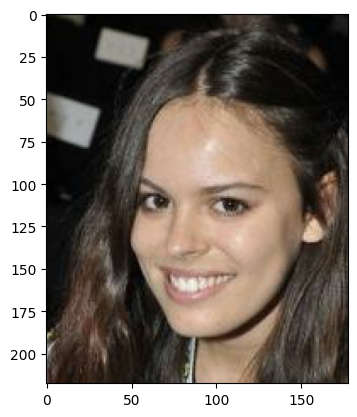

In [27]:
plt.imshow(image.numpy())
plt.show()


In [29]:
# Greyscale the complete dataset

ds_grey = ds.map(lambda x: tf.image.rgb_to_grayscale(x['image']))

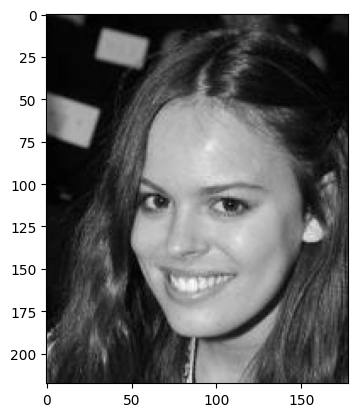

<tf.Tensor: shape=(218, 178, 1), dtype=uint8, numpy=
array([[[ 30],
        [ 30],
        [ 31],
        ...,
        [ 18],
        [  9],
        [ 10]],

       [[ 17],
        [ 18],
        [ 19],
        ...,
        [ 21],
        [ 14],
        [ 15]],

       [[  5],
        [  5],
        [  6],
        ...,
        [ 26],
        [ 21],
        [ 22]],

       ...,

       [[ 96],
        [ 62],
        [ 42],
        ...,
        [ 36],
        [ 59],
        [ 61]],

       [[ 95],
        [ 61],
        [ 36],
        ...,
        [ 48],
        [ 69],
        [ 69]],

       [[102],
        [ 67],
        [ 42],
        ...,
        [ 48],
        [ 69],
        [ 69]]], dtype=uint8)>

In [38]:
# Show image

for example in ds_grey:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    result_tf = example
    plt.imshow(example, cmap='gray')
    plt.show()
result_tf


In [62]:
def greyscale(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114])

def greyscale_tf(image):
    image = tf.cast(image, tf.float32)
    return tf.tensordot(image[..., :3], [0.299, 0.587, 0.114], axes=1)


In [35]:
for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    result_numpy = greyscale(example["image"])

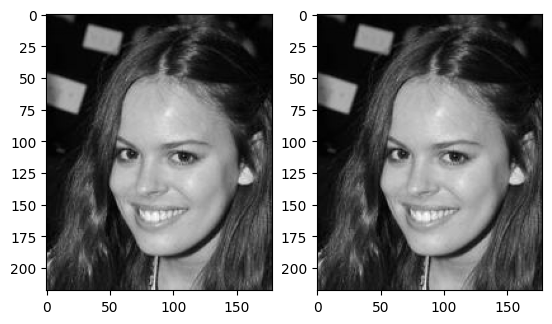

In [39]:
# Compare result_numpy with result_tf

fig, axs = plt.subplots(1, 2)
axs[0].imshow(result_tf, cmap='gray')
axs[1].imshow(result_numpy, cmap='gray')
plt.show()

In [43]:
np.allclose(result_tf.numpy().squeeze(), result_numpy)

False

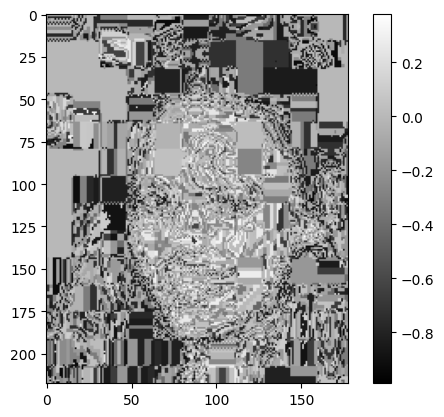

In [48]:
difference = result_tf.numpy().squeeze() - result_numpy

# Plot difference
plt.imshow(difference, cmap='gray')
plt.colorbar()
plt.show()

In [44]:
ds_train = tfds.load('celeb_a', split='train')
ds_val = tfds.load('celeb_a', split='validation')
ds_test = tfds.load('celeb_a', split='test')


In [67]:
# Meaure speed difference of different greyscaling functions

ds_test_grey_tf = ds_test.map(lambda x: tf.image.rgb_to_grayscale(x['image']))

In [68]:
ds_test_grey_np = ds_test.map(lambda x: greyscale_tf(x['image']))

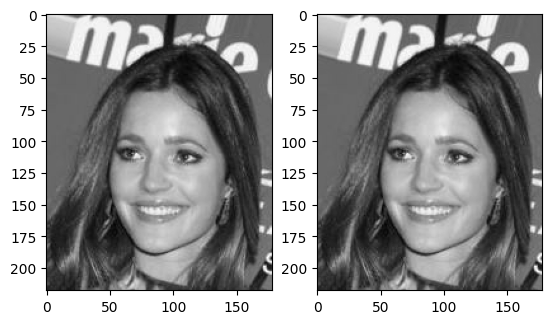

In [64]:
# Compare the first image of both datasets

example_tf = next(iter(ds_test_grey_tf))
example_np = next(iter(ds_test_grey_np))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(example_tf, cmap='gray')
axs[1].imshow(example_np, cmap='gray')
plt.show()
